#Yousef Ahmad Jallad
#1190030

### part1: Model Selection and Hyper-parameters Tunning

# Part1.1: Read the data from the csv file and split it into training set , validation set , and testing set. Plot the examples from the three sets in a scatter plot

In [ ]:
import pandas as pd
import numpy as np
# read data from a csv file
df = pd.read_csv('data_reg.csv')
print(df.head())
print(df.info())

         x1        x2         y
0  0.548814  0.311796  0.547818
1  0.715189  0.696343  0.576032
2  0.602763  0.377752  0.113475
3  0.544883  0.179604  1.072286
4  0.423655  0.024679  0.624525
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB
None


check if the file was read correctly

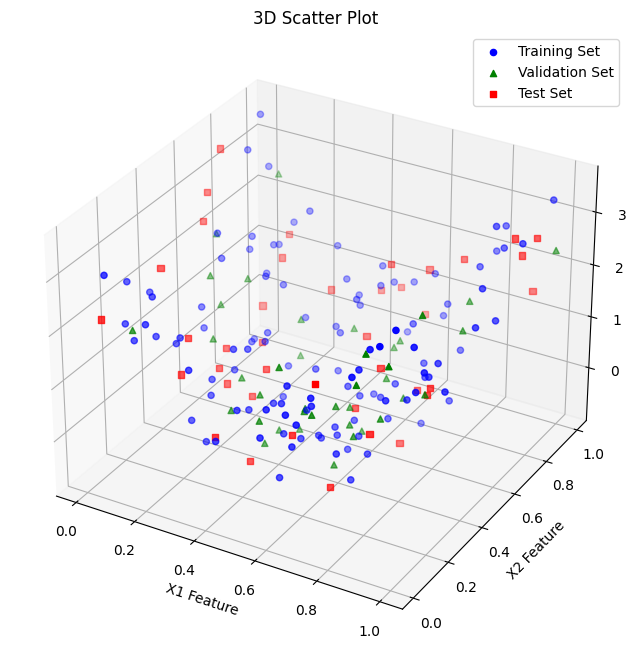

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Splitting the data into training, validation, and testing sets
train_set = df.iloc[:120]
validation_set = df.iloc[120:160]
test_set = df.iloc[160:]

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting each set with different markers
ax.scatter(train_set['x1'], train_set['x2'], train_set['y'], color='b', marker='o', label='Training Set')
ax.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], color='g', marker='^', label='Validation Set')
ax.scatter(test_set['x1'], test_set['x2'], test_set['y'], color='r', marker='s', label='Test Set')

# Labels and title
ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Target Label (y)')
ax.set_title('3D Scatter Plot ')
ax.legend()

# Show plot
plt.show()


The data set was splitted as follows:
Training Set (first 120 examples)
Validation Set (next 40 examples)
Test Set (last 40 examples)

The x axes repesent the features of x1, y axes represent the features of x2, and z represents the feature of. This visualization helps in understanding the distribution and separation of the data across the three sets


# Part 1.2: Apply polynomial regression on the training set with degrees in the range of 1 to 10. plot the validation error vs polynomial degree curve, and plot the surface of the learned function alongside with the training examples for each model

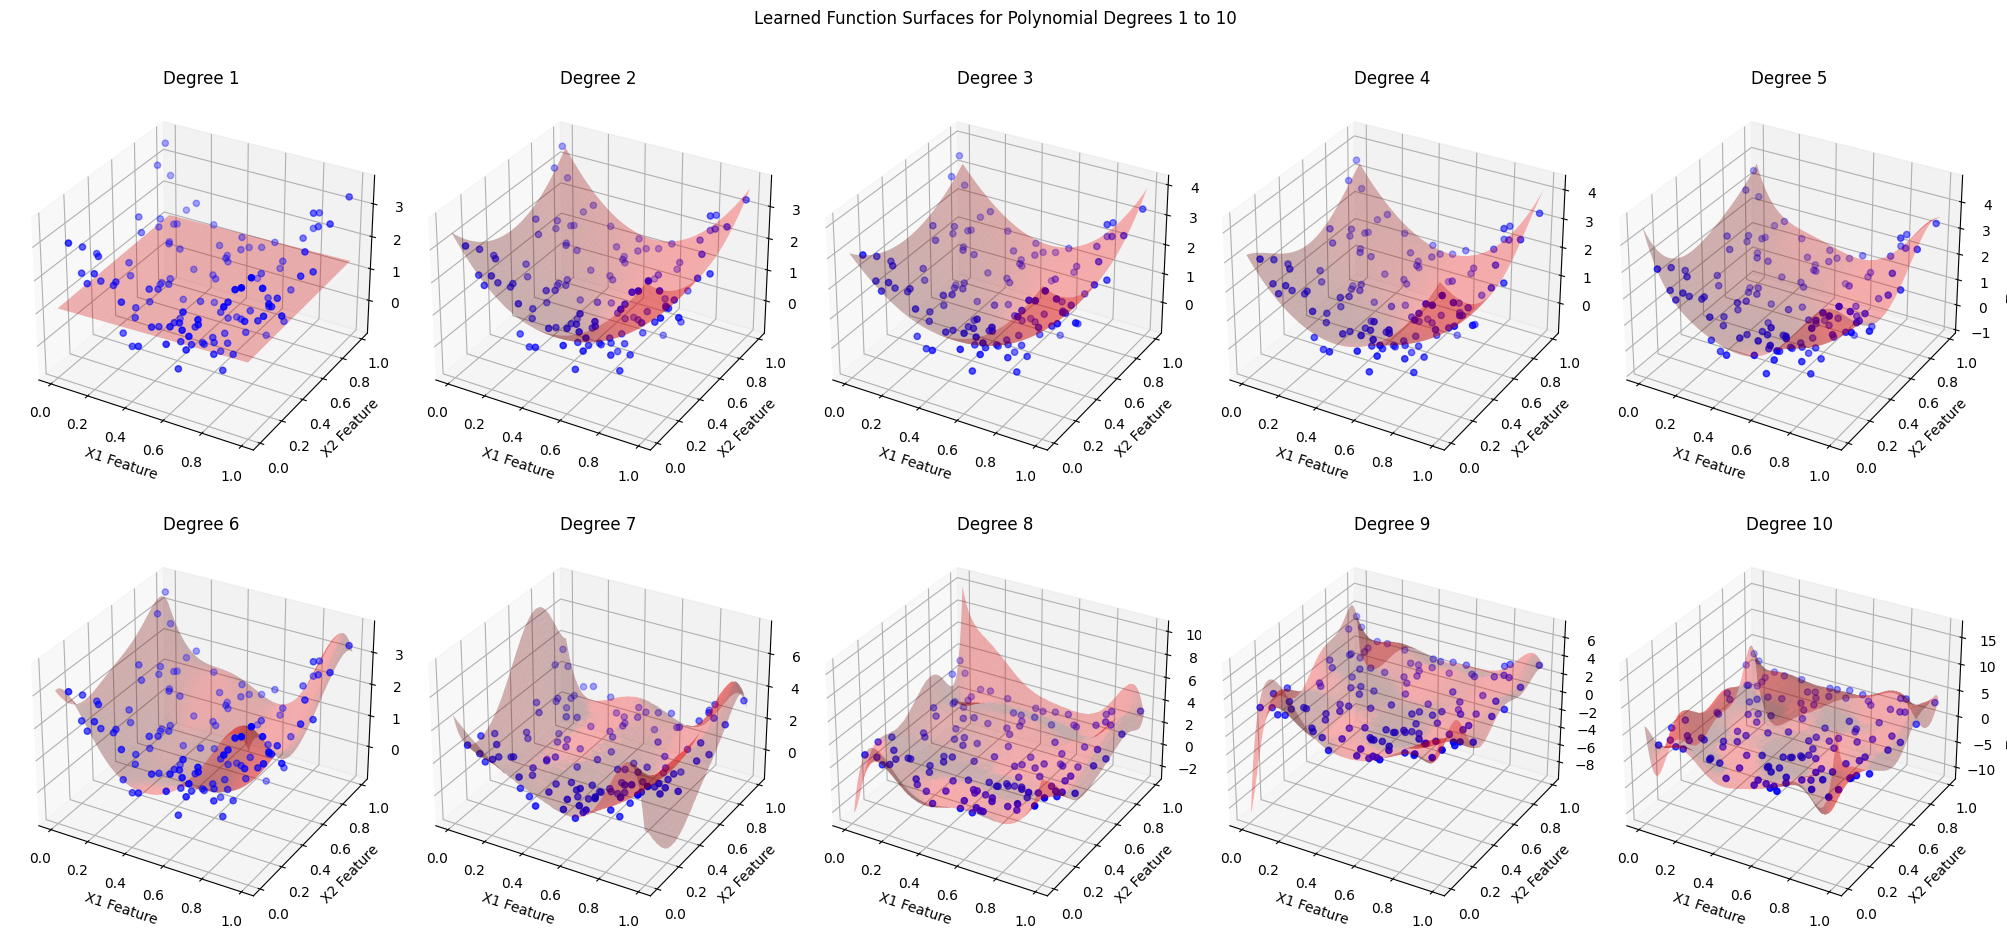

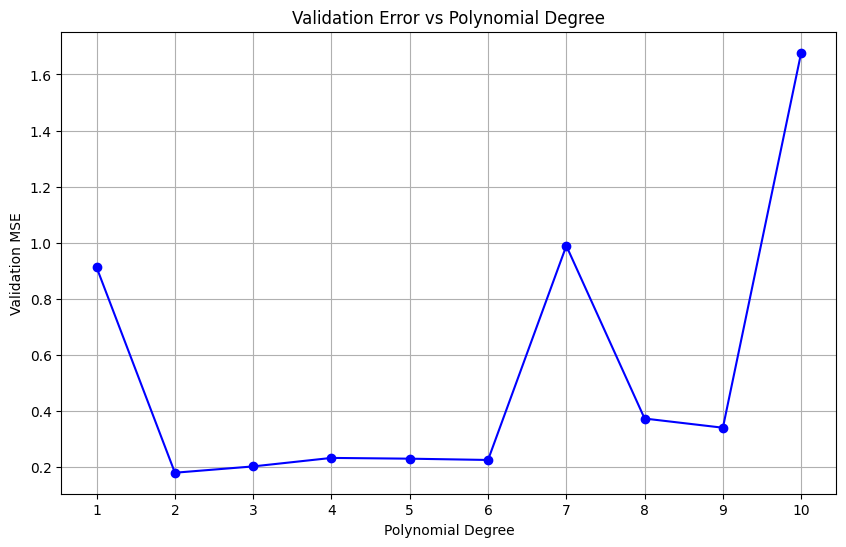

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Splitting the dataset
train_set = df.iloc[:120]
validation_set = df.iloc[120:160]
test_set = df.iloc[160:]

# Extracting features and labels from the training and validation sets
X_train = train_set[['x1', 'x2']]
y_train = train_set['y']
X_val = validation_set[['x1', 'x2']]
y_val = validation_set['y']

# Applying polynomial regression for degrees 1 to 10
validation_errors = []
models = []
for degree in range(1, 11):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on validation set and calculate MSE
    y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_val_pred)
    validation_errors.append(mse)
    models.append(model)

# Creating subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10), subplot_kw={'projection': '3d'})
fig.suptitle('Learned Function Surfaces for Polynomial Degrees 1 to 10')

for i in range(10):
    degree = i + 1
    ax = axs[i // 5, i % 5]

    # Scatter plot of training examples
    ax.scatter(X_train['x1'], X_train['x2'], y_train, color='b', label='Training Set')

    # Creating a meshgrid for plotting the surface
    x1_range = np.linspace(X_train['x1'].min(), X_train['x1'].max(), 100)
    x2_range = np.linspace(X_train['x2'].min(), X_train['x2'].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    # Transforming the grid for polynomial features
    poly = PolynomialFeatures(degree)
    X_grid_poly = poly.fit_transform(X_grid)

    # Predicting over the grid
    y_grid_pred = models[i].predict(X_grid_poly).reshape(x1_grid.shape)

    # Plotting the surface
    ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.3, color='r', label='Learned Function')

    # Labels and title
    ax.set_xlabel('X1 Feature')
    ax.set_ylabel('X2 Feature')
    ax.set_zlabel('Target Label (y)')
    ax.set_title(f'Degree {degree}')

plt.tight_layout()
plt.show()

# Plotting validation error vs polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), validation_errors, marker='o', color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation MSE')
plt.title('Validation Error vs Polynomial Degree')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


The polynomial regression models for degrees 1 to 10 have been applied to the training set, and their validation errors (Mean Squared Error, MSE) have been calculated.

the above plots display the learned function surface and training data for the polynomial regression demosntrate how well the corresponding polynomial degree fits the data points, shown as blue dots, with the surface indicating the model's predictions.






#Part 1.3: Apply ridge regression on the training set to fit a polynomial of degree 8

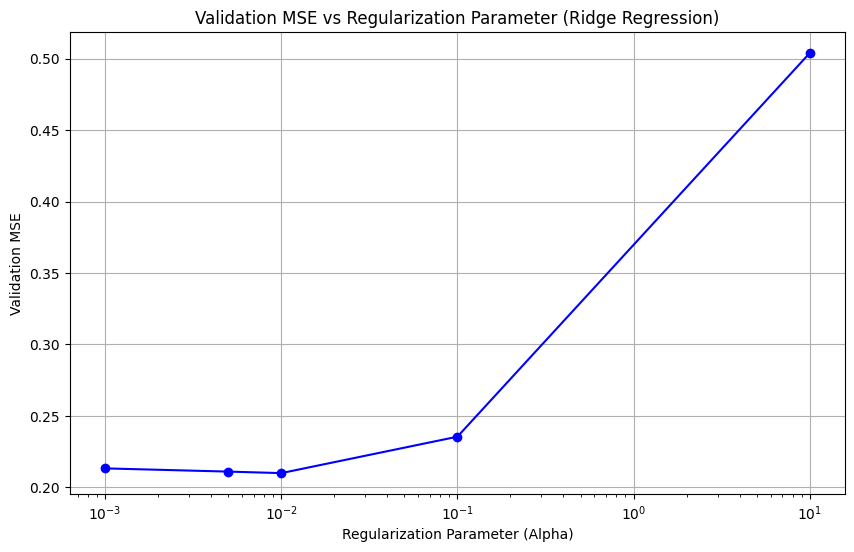

In [ ]:
from sklearn.linear_model import Ridge

# Splitting the dataset
train_set = df.iloc[:120]
validation_set = df.iloc[120:160]
test_set = df.iloc[160:]

# Extracting features and labels from the training and validation sets
X_train = train_set[['x1', 'x2']]
y_train = train_set['y']
X_val = validation_set[['x1', 'x2']]
y_val = validation_set['y']

# Polynomial degree
degree = 8

# Regularization parameter options
regularization_params = [0.001, 0.005, 0.01, 0.1, 10]

# Create polynomial features for degree 8
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Lists to store validation errors for each regularization parameter
ridge_validation_errors = []

# Apply Ridge Regression for each regularization parameter
for alpha in regularization_params:
    # Train the model with Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    # Predict on validation set and calculate mean squared error
    y_val_pred = ridge_model.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_val_pred)
    ridge_validation_errors.append(mse)

# Plotting MSE on validation vs regularization parameter
plt.figure(figsize=(10, 6))
plt.plot(regularization_params, ridge_validation_errors, marker='o', color='b')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs Regularization Parameter (Ridge Regression)')
plt.xscale('log')  # Setting the x-axis to log scale for better visualization
plt.grid(True)
plt.show()


The plot demonstrates the Mean Squared Error (MSE) on the validation set against each regularization value. it can be observed that the regularization value alpha = 0.01 results in the lowest MSE, meaning that it is the best choice among the provided options for this specific ridge

###Part 2: Logistic Regression


#Part 2.1: Learn a logistic regression model with a linear decision boundary. And draw the decision boundary of the learned model on a scatterplot of the training set

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


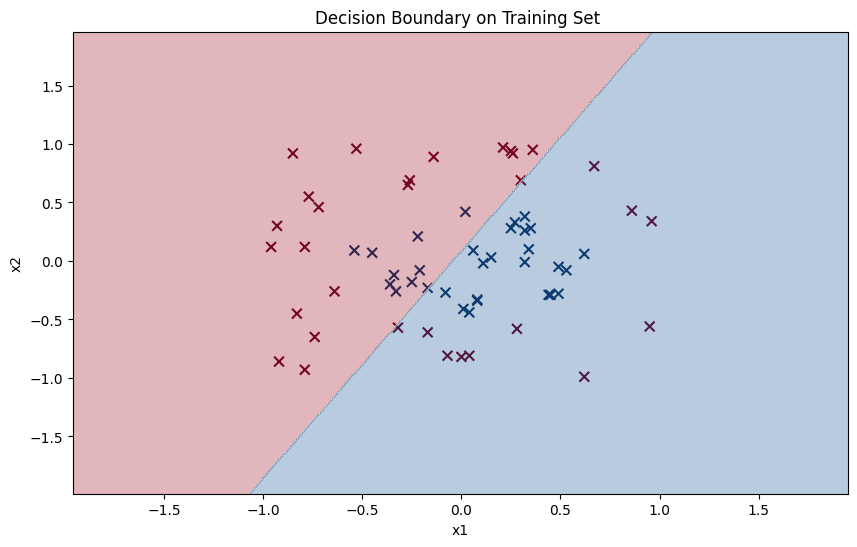

Training Accuracy: 66.13%
Testing Accuracy: 68.18%


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the datasets
df_test = pd.read_csv('test_cls.csv')
df_train = pd.read_csv('train_cls.csv')

# Preparing the data
X_test = df_test[['x1', 'x2']]
y_test = df_test['class']
X_train = df_train[['x1', 'x2']]
y_train = df_train['class']


# Encoding the class labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the logistic regression model with a linear decision boundary
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_encoded)

# Compute the training and testing accuracy
train_accuracy = log_reg.score(X_train, y_train_encoded)
test_accuracy = log_reg.score(X_test, y_test_encoded)

# Redefine the mesh grid for plotting the decision boundary
x_min, x_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
y_min, y_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z_encoded = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting the decision boundary with encoded classes
plt.figure(figsize=(10, 6))
plt.scatter(df_train['x1'], df_train['x2'], c=y_train_encoded, cmap='RdBu', marker='x', s=50)
plt.contourf(xx, yy, Z_encoded, alpha=0.3, cmap='RdBu')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary on Training Set ')
plt.show()

# Display training and testing accuracy
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

The accuracy values show how well the model performs on the datasets used for training and testing. The decision border provides a visual representation of how the model uses the x1 and x2 features to differentiate between the various classes.

as shown in the above figure. Many values crossed the decision boundary line which lead to increasing the error too much. this made it difficult to determine which area represented each feauture as well. It should be noted that this dataset's low variance and substantial bias in the accuracy of the linear logistic regression point to underfitting.

##part2.2: learn a logistic regression model with quadratic decision boundary.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


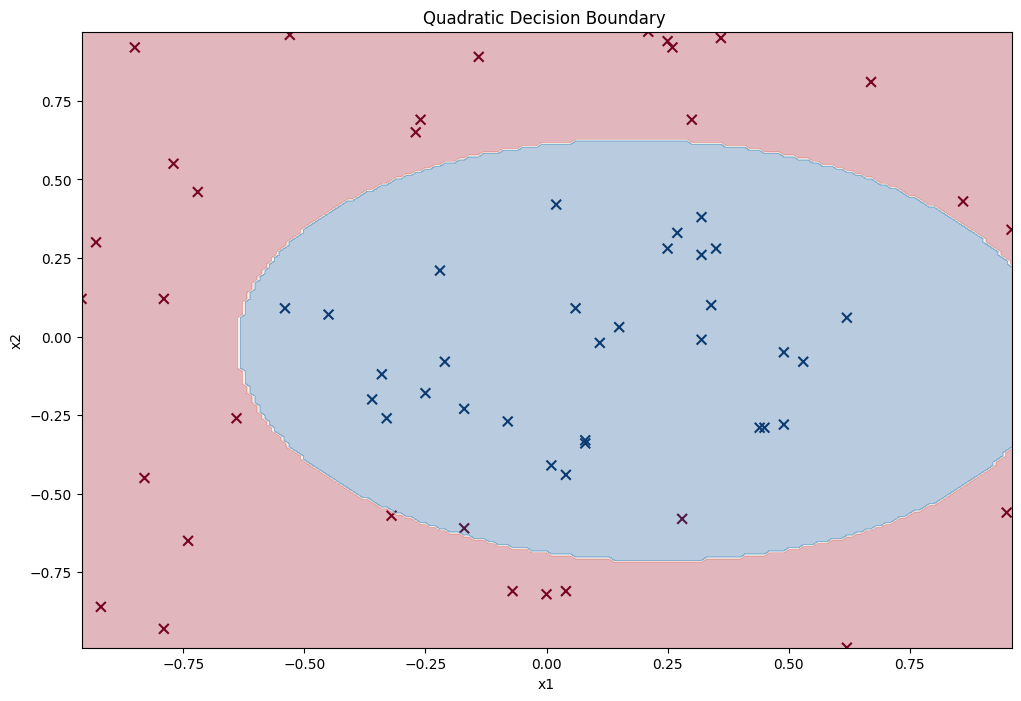

Training Accuracy: 96.77%
Testing Accuracy: 95.45%


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder

# Load the datasets
df_test = pd.read_csv('test_cls.csv')
df_train = pd.read_csv('train_cls.csv')

# Preparing the data
X_test = df_test[['x1', 'x2']]
y_test = df_test['class']
X_train = df_train[['x1', 'x2']]
y_train = df_train['class']

# Encoding the class labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the logistic regression model with the polynomial features
log_reg_quad = LogisticRegression()
log_reg_quad.fit(X_train_poly, y_train_encoded)

# Generate grid for contour plot
xx_poly = poly_features.transform(np.c_[xx.ravel(), yy.ravel()])
Z_quad = log_reg_quad.predict(xx_poly).reshape(xx.shape)


# Plotting the decision boundary with encoded classes
plt.figure(figsize=(12, 8))
plt.scatter(df_train['x1'], df_train['x2'], c=y_train_encoded, cmap='RdBu', marker='x', s=50)
plt.contourf(xx, yy, Z_quad, alpha=0.3, cmap='RdBu')

# Plot formatting
plt.xlim(X_train['x1'].min(), X_train['x1'].max())
plt.ylim(X_train['x2'].min(), X_train['x2'].max())
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Quadratic Decision Boundary ')
plt.show()

# Displaying accuracies
train_accuracy_quad = log_reg_quad.score(X_train_poly, y_train_encoded)
test_accuracy_quad = log_reg_quad.score(X_test_poly, y_test_encoded)
print(f'Training Accuracy: {train_accuracy_quad * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy_quad * 100:.2f}%')

In comparison to the linear model, the quadratic decision boundary has shown a significant improvement in accuracy, showing a better fit for the data. The plot shows how the two classes are more effectively separated by the quadratic decision boundary curve.

contour function was used because the data set is three-dimensional represented and need to br represented in two dimensions, where the colors fill the space between the contour lines to indicate different ranges or levels of the third dimension.

##Part2.3: Comment on the learned models in 1 and 2 in terms of overfitting/underfitting.

the data showed that the initial model was underfitted. Given that there was little variation in the training and testing accuracy, it can't be said that it is overfitted we can say that it is well-fitted.